# $1^{st}$ exercise

## Notebook setup

#### Used libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import cauchy

#### Reading and printing config files

In [2]:
def LoadConfig(path):
    d={}
    with open(path) as file:
        for line in file:
            (directive,key, val) = line.split()
            if(directive=="#define"): d[key] = int(val)
    return d

def PrintConf(d):
    for key, val in d.items(): print("{0:<19}{1}".format(key,val))

#### Colors, just for fun

In [7]:
bgp = "#191724"
txt = "#e0def4"
err = "#908caa"
er2 = "#6e6a86"
lmn = "#eb6f92"

## 01.1 - Testing the pseudo-random number generator

**Goal:** to test the pseudo-random number generator in `lib/Random`, which basic function is to exctract a uniformly a number $r\in[0,1)$. To do so, we are going to evaluate the mean $\langle r \rangle$ and the variance $\sigma^2$, and to implement the $\chi^2$ test.

**Expectations:**  <br>
- Mean: $\langle r\rangle=\int_0^1\mathrm{d}r\,r=0.5$; <br>
- Variance: $\sigma^2=\int_0^1\mathrm{d}r\,(r-0.5)^2=0.08\overline{3}$.
 
**Methodological notes:** We use the datablocking method to evaluate statistical uncertainties for $\langle r\rangle,\,\sigma^2$.

###  Parameters
For mean and variance evaluations we divided the estimation in `N_BLOCKS` blocks with `STEPS_PER_BLOCK` steps each - 
with:

In [4]:
c1=LoadConfig("config/011-ave_var-conf.inl")
PrintConf(c1)

N_BLOCKS           100
STEPS_PER_BLOCK    1000


We then run `N_TESTS` $\chi^2$ tests with `THROWS` throws in each test, dividing $[0,1)$ interval in `N_INTERVALS` subintervals - with:

In [5]:
c2=LoadConfig("config/011-chi2-conf.inl")
PrintConf(c2)

N_INTERVALS        100
THROWS             10000
N_TESTS            100


### Results
#### Mean

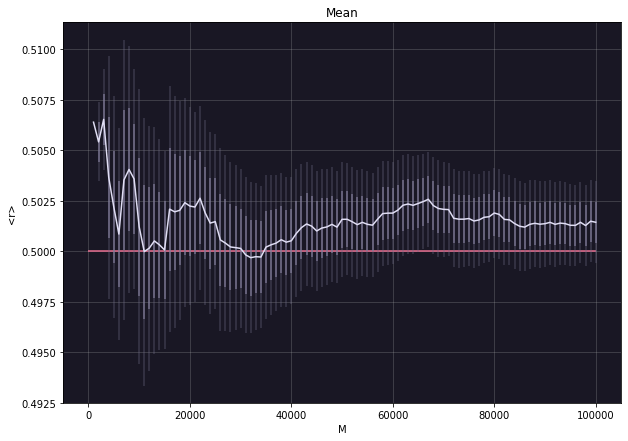

In [8]:
data = np.genfromtxt("Data/011-progressive_averages.csv", delimiter=",", skip_header=1)
data[:,0]*=c1['STEPS_PER_BLOCK']

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.hlines(0.5, 0, c1['STEPS_PER_BLOCK']*c1["N_BLOCKS"],color=lmn)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
plt.vlines(data[:,0],-data[:,2]+data[:,1],data[:,2]+data[:,1],color=err,alpha=0.8)
plt.vlines(data[:,0],-2*data[:,2]+data[:,1],2*data[:,2]+data[:,1],color=er2,alpha=0.4)
plt.errorbar(data[:,0],data[:,1],color=txt)
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean")
plt.grid(alpha=0.3)
plt.show()

#### Variance

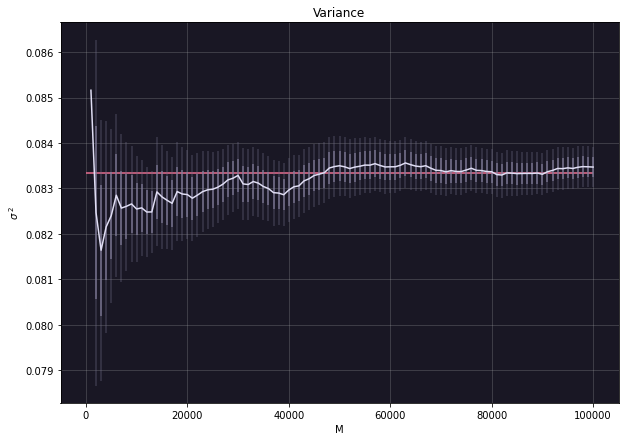

In [208]:
data = np.genfromtxt("Data/011-progressive_variances.csv", delimiter=",", skip_header=1)
data[:,0]*=c1['STEPS_PER_BLOCK']

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.hlines(1/12, 0, c1['STEPS_PER_BLOCK']*c1["N_BLOCKS"],color=lmn)
plt.vlines(data[:,0],-data[:,2]+data[:,1],data[:,2]+data[:,1],color=err,alpha=0.8)
plt.vlines(data[:,0],-2*data[:,2]+data[:,1],2*data[:,2]+data[:,1],color=er2,alpha=0.4)
plt.errorbar(data[:,0],data[:,1],color=txt)
plt.xlabel('M')
plt.ylabel('$\sigma\,^2$')
plt.title("Variance")
plt.grid(alpha=0.3)
plt.show()

####  $\chi^2$ test

(27.463892214249917, 48.69844248596089, 1.823745631525524)


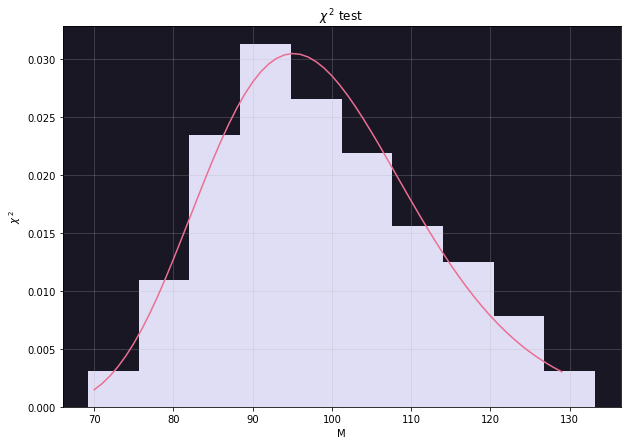

In [209]:
data = np.genfromtxt("Data/011-chi2.dat")

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)

plt.hist(data,color=txt,density=True)

parameter = chi2.fit(data) 
x=np.arange(70,130)
y = chi2.pdf(x, *parameter)
plt.plot(x, y, color=lmn)
print(parameter)

plt.xlabel('M')
plt.ylabel('$\chi\,^2$')
plt.title("$\chi\,^2$ test")
plt.grid(alpha=0.3)
plt.show()

### Results
Mean and variance converge to the expected values and their uncertainties decreases by increasing the number of throws (COME DICO CHE SONO NEI 2 SIGMA?)

## 01.2 - Testing the central limit theorem

**Goal:** Extending the pseudo-random number generator introducing sampling from the exponential and the Cauchy-Lorentz distribution (using the method of the inverse cumulative distribution); Testing the central limit theorem (and it's generalized version) throwing a:
- Uniform dice
- Exponential dice ($\lambda=1$)
- Cauchy-Lorentz dice ($\mu=0$, $\Gamma=1$)

**Expectations:** We are going to plot the hystograms of the averages over $N$ throws of the dice. We expect that for large $N$ the hystograms obtained from the uniform and the exponential dices will be well fitted by a gaussian, while the lorentzian dice (having the distribution infinite variance) will be well fitted by a lorentzian. 

###  Parameters
The hystograms are made throwing the dices `THROWS` times - with:

In [100]:
c=LoadConfig("config/012-conf.inl")
PrintConf(c)

THROWS             10000


### Results
#### Uniform dice
To obtain a clear view of the convergence of the averages hystogram for increasing $N$ we divided $[1,6)$ into 100 subintervals instead of 6 subintervals of width 1. Thus, we are not properly simulating a dice. This is justified by the fact that the term "dice" is forced to be intended in somehow a broader meaning for the exponential and the lorentzian dices, since their values is taken in an infinite interval.

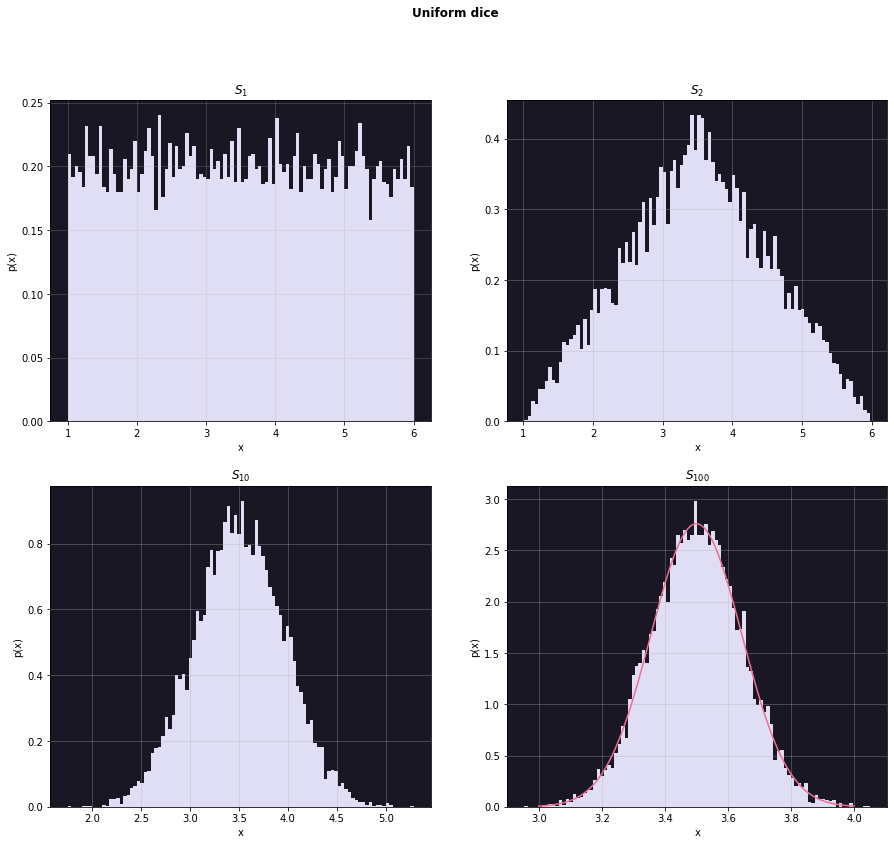

(3.5000900500000003, 0.14455687602648828)


In [214]:
xs = np.genfromtxt("Data/012-unif.csv", delimiter=",", skip_header=1)

fig=plt.figure(figsize=(15, 13))
plt.suptitle('Uniform dice', weight='bold')

#N=1
plt.subplot(221)
fig.axes[0].set_facecolor(bgp)
plt.hist(xs[:,0],100, density=True, color=txt)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.3) 


#N=2
plt.subplot(222)
fig.axes[1].set_facecolor(bgp)
plt.hist(xs[:,1],100, density=True, color=txt)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.4) 

#N=10
plt.subplot(223)
fig.axes[2].set_facecolor(bgp)
plt.hist(xs[:,2],100, density=True, color=txt)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.4) 

#N=100
plt.subplot(224)
fig.axes[3].set_facecolor(bgp)
plt.hist(xs[:,3],100, density=True, color=txt)

parameter = norm.fit(xs[:,3]) 
x = np.linspace(3, 4, 100)
y = norm.pdf(x, *parameter)
plt.plot(x, y, color=lmn)

plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.4) 


plt.show()
print(parameter)

#### Exponential dice

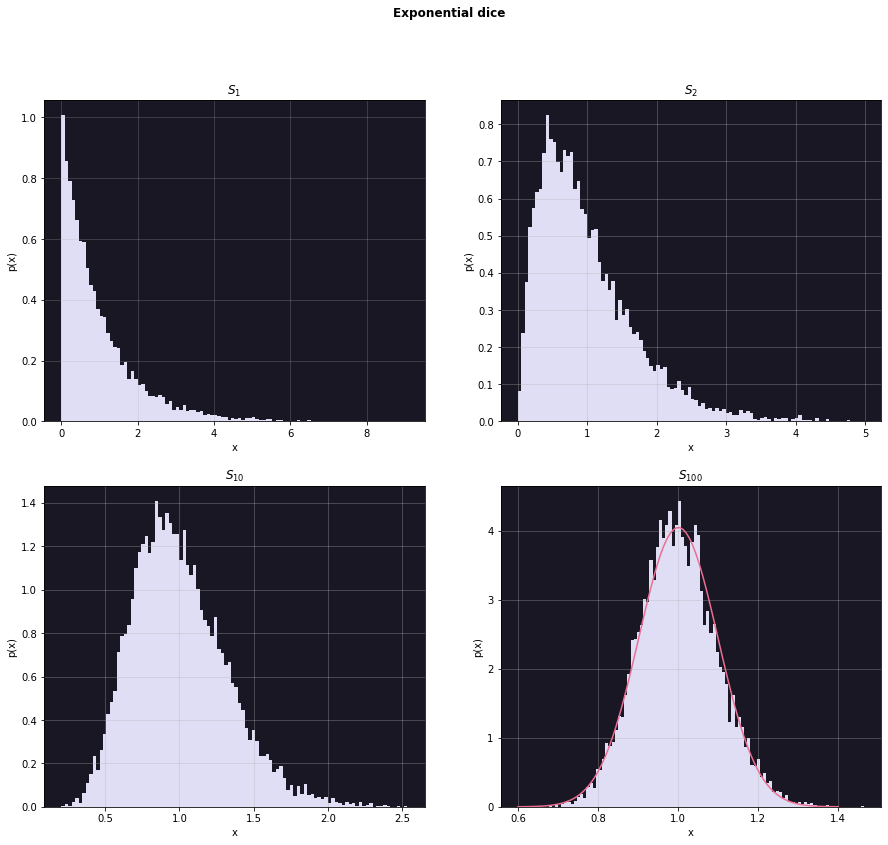

(1.0005304437, 0.09862300935707058)


In [211]:
xs = np.genfromtxt("Data/012-exp.csv", delimiter=",", skip_header=1)

fig=plt.figure(figsize=(15, 13))
plt.suptitle('Exponential dice', weight='bold')

#N=1
plt.subplot(221)
fig.axes[0].set_facecolor(bgp)
plt.hist(xs[:,0],100, density=True, color=txt)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.3) 


#N=2
plt.subplot(222)
fig.axes[1].set_facecolor(bgp)
plt.hist(xs[:,1],100, density=True, color=txt)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.4) 

#N=10
plt.subplot(223)
fig.axes[2].set_facecolor(bgp)
plt.hist(xs[:,2],100, density=True, color=txt)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.4) 

#N=100
plt.subplot(224)
fig.axes[3].set_facecolor(bgp)
plt.hist(xs[:,3],100, density=True, color=txt)

parameter = norm.fit(xs[:,3]) 
x = np.linspace(0.6, 1.4, 100)
y = norm.pdf(x, *parameter)
plt.plot(x, y, color=lmn)

plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.4) 


plt.show()
print(parameter)

#### Lorentzian dice

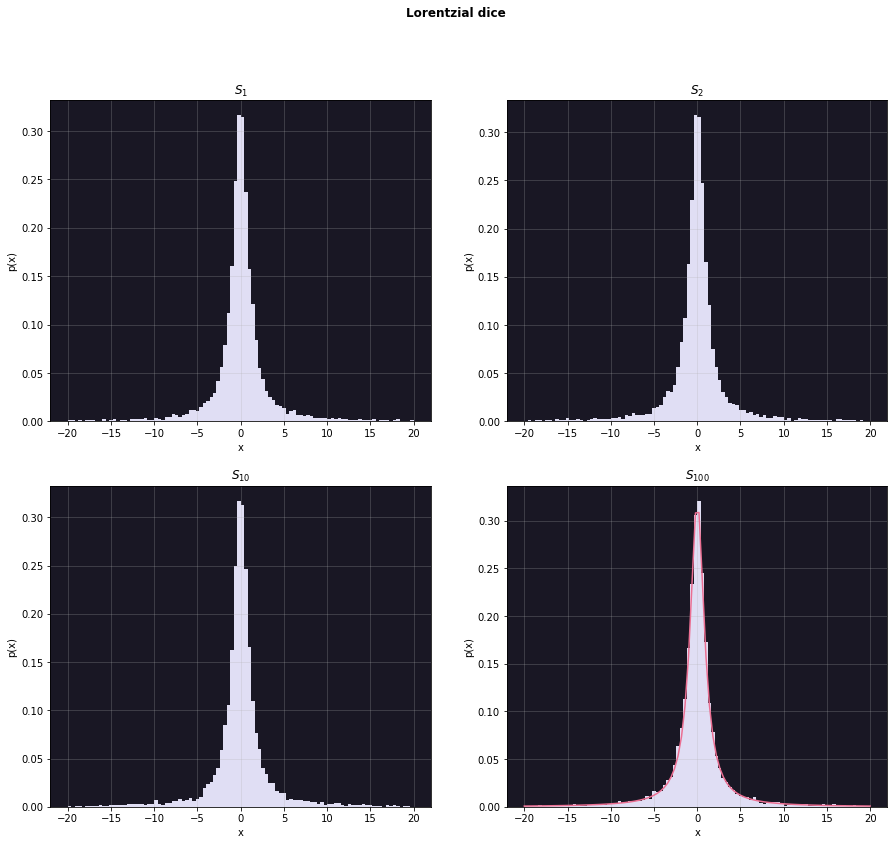

(0.002016215928899528, 0.9916838382842227)


In [212]:
xs = np.genfromtxt("Data/012-cauchy.csv", delimiter=",", skip_header=1)
edge=20

fig=plt.figure(figsize=(15, 13))
plt.suptitle('Lorentzial dice', weight='bold')

#N=1
plt.subplot(221)
fig.axes[0].set_facecolor(bgp)
plt.hist(xs[:,0], 100, range=(-edge,edge), density=True, color=txt)
plt.title('$S_1$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.3) 

#N=2
plt.subplot(222)
fig.axes[1].set_facecolor(bgp)
plt.hist(xs[:,1],100, range=(-edge,edge), density=True, color=txt)
plt.title('$S_2$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.3) 

#N=10
plt.subplot(223)
fig.axes[2].set_facecolor(bgp)
plt.hist(xs[:,2], 100, range=(-edge,edge), density=True, color=txt)
plt.title('$S_{10}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.3) 

#N=100
plt.subplot(224)
fig.axes[3].set_facecolor(bgp)
plt.hist(xs[:,3], 100, range=(-edge,edge), density=True, color=txt)

parameter = cauchy.fit(xs[:,3]) 
x = np.linspace(-edge, edge, 100)
y = cauchy.pdf(x, *parameter)
plt.plot(x, y, color=lmn)

plt.title('$S_{100}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.3) 


plt.show()
print(parameter)

### Conclusion
Results confirm our expectations

## 01.3 - Buffon's experiment
**Goal:** Implement the Buffon's experiment to get an estimation for the value of $\pi$.

**Expectations:**  Well, $\pi$!
 
**Methodological notes:** 
- Buffon's experiment allow us to estimate $\pi$ by throwing $N$ needles of lenght $l$ onto a flat surface ruled with equally-spaced lines at a distance $d$ and counting how many needles intersect the lines ($N_{hit}$) with the formula
\begin{equation}
    \pi=\frac{2l N}{N_{hit}d}
    \label{eqn:pi}
\end{equation}
We clearly see some symmetries. The problem is equivalent to that of "throwing" a segment of random lenght (the projection of the needle in the direction orthogonal to the lines) onto a 1d lattice of equally spaced points.The fact that we are only considering the projection means that the meaningful interval for the angle is that of width $\pi/2$, while the traslational symmetry allow us to focus on a single "cell" of the lattice -in fact, since we don't need to know which part of the needle intersects the line, we can focus only on half-a-cell. 

- In order to avoid using $\pi$ in the implementation of the algorithm we decided to sample a "directional vector" in the first quadrant of the plane instead of the angle, by generating its coordinate $(x,y)$ in the square $[0,1)\times[0,1)$. Clealrly the more we get near the diagonal the more vectors become available: to generate the vector uniformly we have to impose that $(x,y)$ lies in the circumference of radious 1. (Note: the inversion of the cumulative method does not solve the problem).

- We use datablocking to evaluate statistical uncertainties.

# Parameters

In [225]:
c1=LoadConfig("config/013-conf.inl")
PrintConf(c1)

NEEDLE_LENGHT      1
GRID_SPACE         2
N_BLOCKS           100
STEPS_PER_BLOCK    10000


Buffon's experiment allow us to estimate $\pi$ by throwing $N$ needles of lenght $l$ onto a flat surface ruled with equally-spaced lines at a distance $d$ and counting how many needles intersect the lines ($N_{hit}$) with the formula
\begin{equation}
    \pi=\frac{2l N}{N_{hit}d}
    \label{eqn:pi}
\end{equation}

We clearly see some symmetries. The problem is equivalent to that of "throwing" a segment of random lenght (the projection of the needle in the direction orthogonal to the lines) onto a 1d lattice of equally spaced points the fact that we are only considering the projection means that the meaningful interval for the angle is that of width $\pi/2$, while the traslational symmetry allow us to focus on a single "cell" of the lattice -in fact, since we don't need to know which part of the needle intersects the line, we can focus only on half-a-cell.
The algorithm to simulate the experiment is immediate at a first sight. For each needle:
+ generate a random number in $[0,d/2)$ representing the midpoint of the needle
+ generate a random number in $[0,\pi/2)$ representing the angle of the needle;
+ check if the needle intersects a line

By doing this way we are using $\pi$ to evaluate $\pi$!

We've found two solutions to this problem: one wich make uses of the theorem of contractions; the other based on the generation of a direction vector that tells us the direction of the needle.

### First solution
Let's first of all understand where \eqref{eqn:pi} comes from. We can consider the poistion of the midpoint ad the angle indipendent and generated by the uniform distributions of probability $p_x=2/d$, $p_{\theta}=2/\pi$.
The probability that a needle intersects a line is therefore
\begin{equation}
    P=\int_0^{\frac{\pi}{2}}d{\theta}\int_0^{\frac{l}{2}\sin\theta}d{x}\frac{l}{d}\frac{2}{\pi}=\frac{2l}{d\pi}
\end{equation}
Rewriting in terms of $P$ 
\begin{equation}
    P=\int_0^{\frac{l}{d}\frac{1}{p}}d{\theta}\int_0^{\frac{l}{2}\sin\theta}\frac{l}{d}\frac{d}{l}P=P(1-cos(\frac{l}{dP}))
\end{equation}
Such that $P$ is a fixed point for the function $f(x)=x(1-\cos(\frac{l}{dx}))$. If we are able to prove that $f$ is a contraction (which means that $|f(y)-f(x)|=\tau|y-x|$ with $\tau\in(0,1)$) thanks to the teorem of contraction we get that $P$ is the only fixed point of $f$ and that the succesion $P_{n+1}=f(P_n)$ converges to $P$. 
Notice that the unit circumference (of area $\pi$) is inscribes the square of area 2 and is inscribed in the square of area 4, which means that we need to show that $f$ is a contraction only in $(2,4)$.


### Results

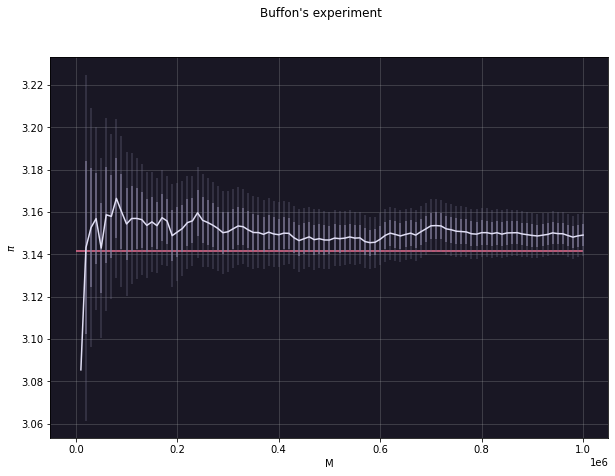

In [226]:
data = np.genfromtxt("Data/013-pi_progressive_estimate_circle.csv", delimiter=",", skip_header=1)
data[:,0]*=c1['STEPS_PER_BLOCK']

fig=plt.figure(figsize=(10, 7))
plt.axes().set_facecolor(bgp)
plt.suptitle("Buffon's experiment")

plt.hlines(3.1415926, 0, c1['STEPS_PER_BLOCK']*c1["N_BLOCKS"],color=lmn)
plt.vlines(data[:,0],-data[:,2]+data[:,1],data[:,2]+data[:,1],color=err,alpha=0.8)
plt.vlines(data[:,0],-2*data[:,2]+data[:,1],2*data[:,2]+data[:,1],color=er2,alpha=0.4)
plt.errorbar(data[:,0],data[:,1],color=txt)
plt.xlabel('M')
plt.ylabel('$\pi$')
plt.grid(alpha=0.3)

plt.show()

### Conclusion